聚类算法-AP聚类
===

AP(Affinity Propagation)算法是一种基于近邻传播的半监督聚类算法。

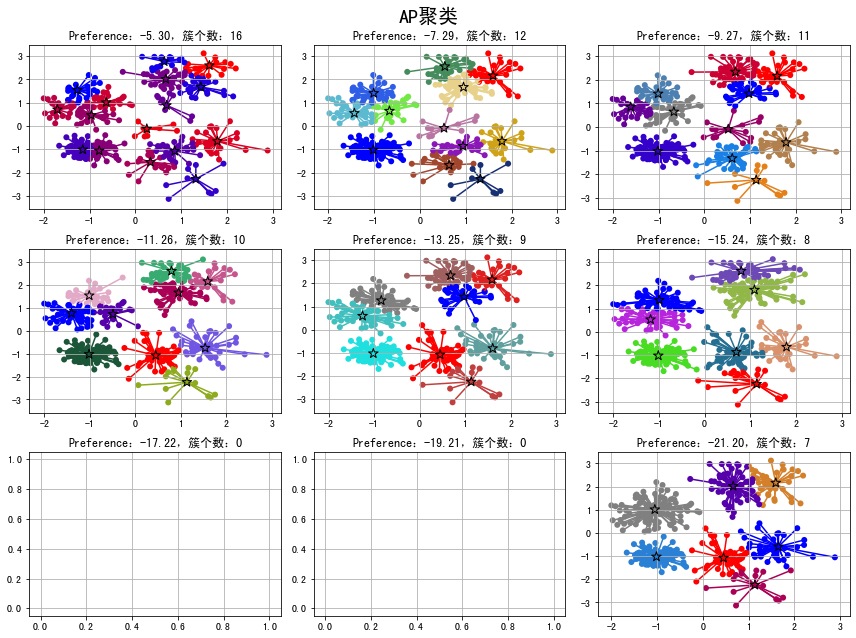

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances

N = 400
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
m = euclidean_distances(data, squared=True)
preference = -np.median(m)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 9), facecolor='w')
for i, mul in enumerate(np.linspace(1, 4, 9)):
    p = mul * preference
    model = AffinityPropagation(affinity='euclidean', preference=p)
    af = model.fit(data)
    center_indices = af.cluster_centers_indices_
    n_clusters = len(center_indices)
    y_hat = af.labels_

    plt.subplot(3, 3, i+1)
    plt.title(u'Preference：%.2f，簇个数：%d' % (p, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append("#{:06X}".format(int(c), 2))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
        center = data[center_indices[k]]
        for x in data[cur]:
            plt.plot([x[0], center[0]], [x[1], center[1]], color=clr, zorder=1)
    plt.scatter(data[center_indices, 0], data[center_indices, 1], s=100, c=clrs, marker='*', edgecolors='k', zorder=2)
    plt.grid(True)
plt.tight_layout()
plt.suptitle(u'AP聚类', fontsize=20)
plt.subplots_adjust(top=0.92)